# Ultimate Take-home Challenge

## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
#import required libraries
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

#read json file into DataFrame
df = pd.read_json('logins.json')

In [2]:
#show first 5 rows
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
#create "date" column
df['date'] = df['login_time'].dt.date

In [5]:
#create "time" column
df['time'] = df['login_time'].dt.time

In [6]:
#make index equal to "login_time"
df.index = df['login_time']
df.head()

,login_time,date,time
login_time,,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1970-01-01,20:13:18
1970-01-01 20:16:10,1970-01-01 20:16:10,1970-01-01,20:16:10
1970-01-01 20:16:37,1970-01-01 20:16:37,1970-01-01,20:16:37
1970-01-01 20:16:36,1970-01-01 20:16:36,1970-01-01,20:16:36
1970-01-01 20:26:21,1970-01-01 20:26:21,1970-01-01,20:26:21


In [7]:
#group into 15min intervals
groups = df.groupby(pd.Grouper(key='login_time', freq='15min'))['date'].count()
groups.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: date, dtype: int64

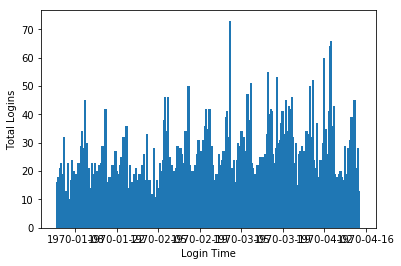

In [8]:
#bar chart of number of logins per 15min interval
plt.bar(groups.index, groups)
plt.ylabel('Total Logins')
plt.xlabel('Login Time')
plt.rcParams["figure.figsize"] = [16,9]

In [9]:
groups.mean()

9.5159378831221897

In [10]:
#sort 15min intervals by counts and show top 20
topinstances =groups.sort_values(ascending=False).head(20)
topinstances

login_time
1970-03-01 04:30:00    73
1970-04-04 05:30:00    66
1970-04-04 01:30:00    64
1970-04-04 01:15:00    63
1970-04-01 23:30:00    60
1970-04-04 05:00:00    60
1970-04-04 05:15:00    59
1970-04-04 04:45:00    59
1970-04-04 01:45:00    56
1970-03-13 22:15:00    55
1970-04-04 01:00:00    54
1970-03-17 01:30:00    53
1970-04-04 00:30:00    53
1970-03-29 04:45:00    52
1970-03-08 04:45:00    51
1970-04-03 22:45:00    50
1970-03-29 02:15:00    50
1970-04-04 00:45:00    50
1970-02-15 04:45:00    50
1970-03-28 04:30:00    50
Name: date, dtype: int64

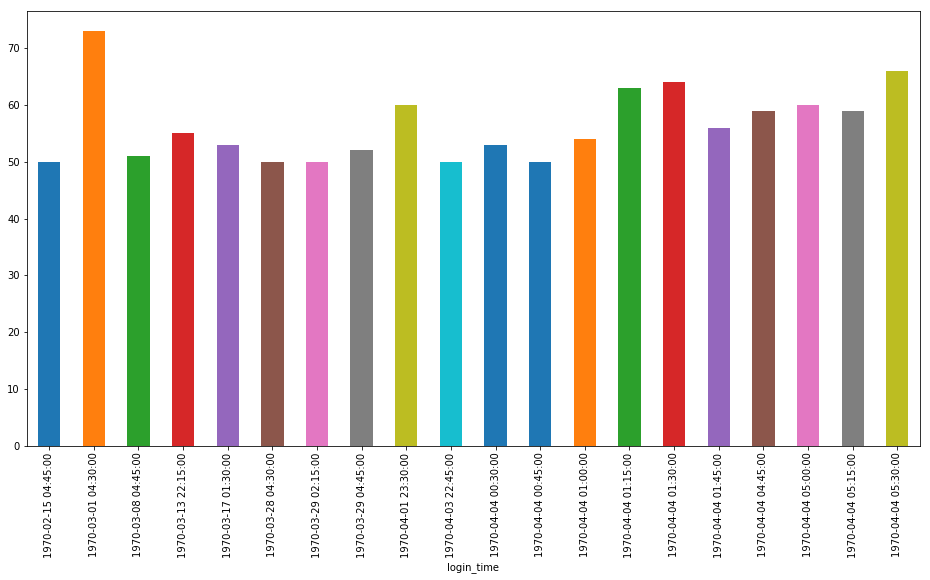

In [11]:
#plot of time instances with top 20 most logins
topinstances.sort_index().plot(kind='bar', figsize=(16, 8))

In [12]:
#create dataframe with 15min intervals
groupsdf = pd.DataFrame(groups)
groupsdf['login'] = groupsdf.index

In [13]:
#create column of just time
groupsdf['time'] = groupsdf['login'].dt.time

In [14]:
groupsdf.head()

,date,login,time
login_time,,,
1970-01-01 20:00:00,2,1970-01-01 20:00:00,20:00:00
1970-01-01 20:15:00,6,1970-01-01 20:15:00,20:15:00
1970-01-01 20:30:00,9,1970-01-01 20:30:00,20:30:00
1970-01-01 20:45:00,7,1970-01-01 20:45:00,20:45:00
1970-01-01 21:00:00,1,1970-01-01 21:00:00,21:00:00


In [15]:
#rename "date" column to "counts"
groupsdf = groupsdf.rename(columns={'date': 'counts'})

In [16]:
#groupby 15min interval (dropping the date) and sum the counts for each
intervals = groupsdf.groupby('time')['counts'].sum()

In [17]:
#sort by login counts per 15min intervals
intervals.sort_values(ascending=False)

time
22:30:00    1684
01:30:00    1673
22:15:00    1652
22:45:00    1637
22:00:00    1634
11:30:00    1622
01:15:00    1598
23:00:00    1573
11:45:00    1570
21:45:00    1554
23:15:00    1552
01:00:00    1549
00:15:00    1547
02:15:00    1526
00:30:00    1525
02:00:00    1509
01:45:00    1497
21:30:00    1492
00:45:00    1482
23:45:00    1477
23:30:00    1456
00:00:00    1439
02:30:00    1429
11:15:00    1404
04:45:00    1404
02:45:00    1336
12:30:00    1334
04:30:00    1334
21:15:00    1325
12:00:00    1304
            ... 
16:15:00     725
16:45:00     714
16:30:00     700
18:00:00     697
16:00:00     693
17:45:00     691
18:15:00     690
17:30:00     644
10:15:00     641
17:00:00     637
17:15:00     612
05:30:00     545
10:00:00     534
09:45:00     481
05:45:00     457
09:30:00     451
06:00:00     369
09:15:00     343
06:15:00     320
09:00:00     252
06:30:00     235
07:15:00     229
08:45:00     227
08:30:00     221
07:00:00     219
06:45:00     214
07:30:00     192
08:00:00 

### The most frequent time interval for login occurrences is at 22:30:00, followed closely by 1:30:00.
### The least frequent time interval is 07:45:00.

In [18]:
# save top 25 most frequent time intervals, then sort by interval
topinter = intervals.sort_values(ascending=False).head(25)
topinter.sort_index()

time
00:00:00    1439
00:15:00    1547
00:30:00    1525
00:45:00    1482
01:00:00    1549
01:15:00    1598
01:30:00    1673
01:45:00    1497
02:00:00    1509
02:15:00    1526
02:30:00    1429
04:45:00    1404
11:15:00    1404
11:30:00    1622
11:45:00    1570
21:30:00    1492
21:45:00    1554
22:00:00    1634
22:15:00    1652
22:30:00    1684
22:45:00    1637
23:00:00    1573
23:15:00    1552
23:30:00    1456
23:45:00    1477
Name: counts, dtype: int64

### The daily cycle appears to have highest activity between 21:30 until 2:30 every night, with a small peak again at 4:45, then a "lunch" surge" between 11:15 to 11:45

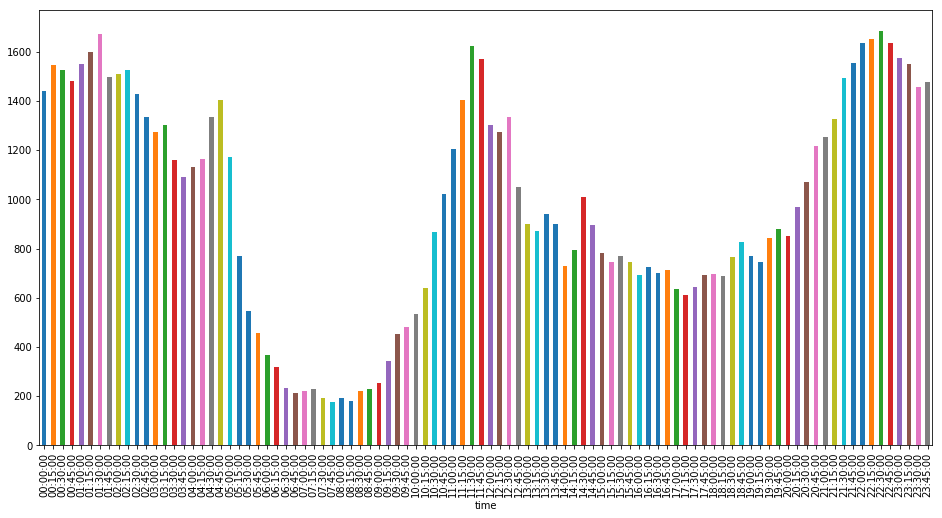

In [19]:
#visualize daily activity cycle
intervals.sort_index().plot(kind='bar', figsize=(16, 8))

In [20]:
#create Day of the Week column
df['day_of_week'] = df['login_time'].dt.weekday_name

In [21]:
#group login instances by Day of the Week
dayofweek = df.groupby('day_of_week')['date'].count()
dayofweek

day_of_week
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: date, dtype: int64

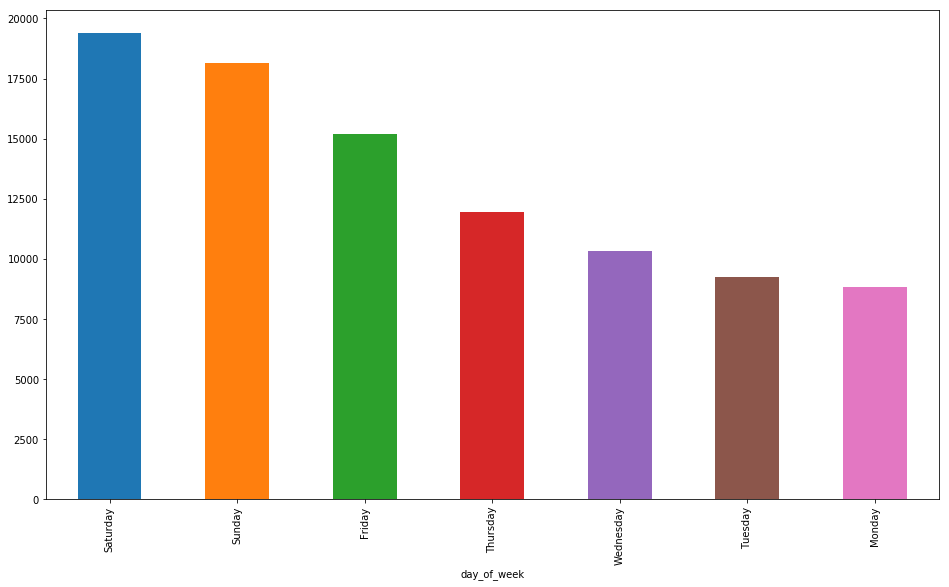

In [22]:
#plot days of the week by number of logins
dayofweek.sort_values(ascending=False).plot(kind='bar')

### Activity is highest on weekends

## Part 2-  Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities by reimbursing all toll costs._

***
**_1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?_**

>The key measure of success in this experiment would be the change in diversity of driver partner’s pick-up locations, which could be measured by the number of rides picked up in the city that is not each driver’s “home” base. This could be measured by comparing location data of ride pick-up for each driver the 30 days previous to the Toll-paying Offer to location data for 30 days after the offer. Determining whether more drivers had pick-ups on either side of the toll bridge, compared to previously, would determine if the experiment was successful in encouraging driver partners to be available in both cities.

>If the goal was to generally increase available driver partners in both cities, which the question did not state, examining total number of rides per city or total available drivers before and after the offer would indicate an increase in activity potentially generated by the offer.
***

**_2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats._**

> I would design an experiment in a A/B Testing fashion, or a between-subject design. First I would look at overall behavior of drivers in both cities, focusing primarily on volume of rides and pick-up locations. From there I would take a random subset of drivers, the size being  dependent upon the experiment’s budget, and offer to reimburse the bridge toll costs. I would make sure that this subset was properly representative of the whole set of drivers, particular in typical pick-up locations and daily activity. 

>I would obtain activity data for the previous 30 days for all drivers, both the experimental group and control group. Then I would compare this data to the 30 days following the reimbursement offer. 

>I would collect data on how many times each driver crossed the bridge, total number of rides per driver, and total rides per driver per city. A driver's "home" city would be assessed by the location data of the data previous to the reimbursement offer. In my analysis I would also take care to see if there was any difference in the experimental group between “high” activity drivers and lower activity drivers.

>First I would calculate if there was an overall increase in number of total rides in the experimental group vs. the control group before and after the offer. I would test the statistical significance of the difference with a Paired T-test, after verifying the normalcy of the distributions. The Null Hypothesis in this case, that the Paired T-test is attempting to disprove, is that there is no change between before/after in the experimental group, or at least the change is no different than that observed in the control group.

>To look more specifically if there was any effect on the shifting of drivers to the other city, I would assess the percentage of rides in each city for each driver, find the difference from the previous month, and average by group, as well as by subgroup (driver activity level). Then I would again use a Paired T-test to determine the statistical significance of the difference of the means before and after the reimbursement offer. The Null Hypothesis here again is that there is no difference between the experimental and control groups.

>The strength of the experimental effect would be assessed based on the p-values from the Paired T-tests. However because a signficant p-value does not indicate a large Effect Size, instead of using the 95% or even 99% confidence interval of p-values to determine efficacy of the program, a better metric would be to compare the aggreate cost of tolls vs how much more revenue was generated by drivers that received the offer from rides in their non-home city. I could build some models to show how much total revenue could be generated by offering the reimbursement to all drivers in both cities. 

>Before full implementation, I would recommend the company expand the experiment, either by increasing the length of the study (perhaps to 6 months) or by expanding the experimental group size. If the expanded experiments showed promising results, then I would encourage full implementation, otherwise I would make other suggestions to approach the problem, such as put the cost of the tolls on the rider rather than the driver. 

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

Data description
-  city: city this user signed up in
-  phone: primary device for this user
-  signup_date: date of account registration; in the form ‘YYYY MM DD’
-  last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’
-  avg_dist: the average distance in miles per trip taken in the first 30 days after signup
-  avg_rating_by_driver: the rider’s average rating over all of their trips
-  avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
-  surge_pct: the percent of trips taken with surge multiplier > 1
-  avg_surge: The average surge multiplier over all of this user’s trips
-  trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
-  ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
-  weekday_pct: the percent of the user’s trips occurring during a weekday

In [214]:
#load the data
import json 
# from pandas.io.json import json_normalize

file=open('ultimate_data_challenge.json', 'r')
file_content=file.read()
file.close()
data=json.loads(file_content)

users=pd.DataFrame(data) 

In [215]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [216]:
users['last_trip_date'] = pd.to_datetime(users['last_trip_date'])

In [217]:
users['signup_date'] = pd.to_datetime(users['signup_date'])

### Columns with NaN values: "avg_rating_by_driver", "avg_rating_of_driver", "phone"
####  "phone" cannot be replaced with a mean/median and are <1% of the data, so they can simply be dropped
#### "avg_rating_of_driver" has too many NaN values (16%) to simply drop
### Density plots the numeric features will determine whether it is better to fill NaN values with the mean or median

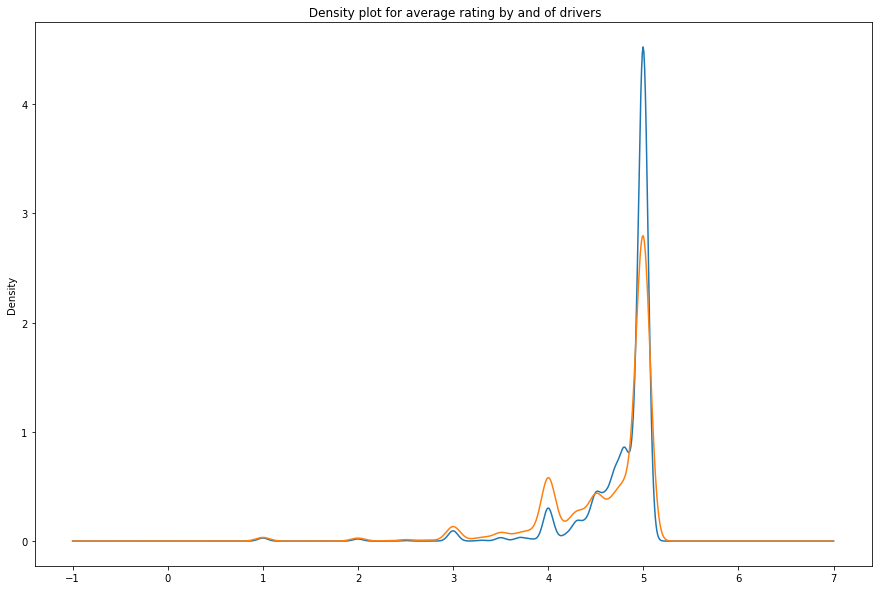

In [218]:
## Density plot for avg_rating_by_driver
fig, ax = plt.subplots(figsize=(15,10))
u = pd.Series(users['avg_rating_by_driver'])
u.plot(kind='kde')

## Density plot for avg_rating_of_driver
d = pd.Series(users['avg_rating_of_driver'])
d.plot(kind='kde')
ax.set_title(' Density plot for average rating by and of drivers')

plt.show()

### The distribution for these features is not normal, as they have a left skew, so median is the best choice for replacing NaN values

In [219]:
#Fill NaN values in numeric columns (avg_rating_by_driver & avg_rating_of_driver) with the median of those columns
users = users.fillna(users.median())

In [220]:
#drop remaining NaN values (only left in 'phone' column)
users = users.dropna()

In [221]:
users.isnull().any()

avg_dist                  False
avg_rating_by_driver      False
avg_rating_of_driver      False
avg_surge                 False
city                      False
last_trip_date            False
phone                     False
signup_date               False
surge_pct                 False
trips_in_first_30_days    False
ultimate_black_user       False
weekday_pct               False
dtype: bool

## Determine retention rate:

In [222]:
# show earliest and latest dates users signed up
print (users.signup_date.min())
print (users.signup_date.max())

2014-01-01 00:00:00
2014-01-31 00:00:00


In [223]:
#double check "year" of all signup dates
pd.DatetimeIndex(users['signup_date']).year.value_counts()

2014    49604
Name: signup_date, dtype: int64

In [224]:
#double check "month" of all signup dates
pd.DatetimeIndex(users['signup_date']).month.value_counts()

1    49604
Name: signup_date, dtype: int64

### All users in this dataset signed up in January 2014

In [225]:
# show earliest and latest dates users last tooka a trip
print (users.last_trip_date.min())
print (users.last_trip_date.max())

2014-01-01 00:00:00
2014-07-01 00:00:00


### Last-trip-dates range from Jan 1, 2014 to July 1, 2014

In [226]:
#create column of "retained" users that took rides in June (after May 31)
users['retained'] = np.where(users.last_trip_date > '2014-05-31', 1, 0)  

In [227]:
#number of retained users divided by total users
len(users[users.retained==1])/len(users.retained)

0.37640109668575117

## 37.64% of users that signed up in January 2014 were retained (still active in the 6th month).

In [228]:
#create new data frame for modeling
use_pdct = users

In [229]:
#create numeric labels for categorical features
from sklearn.preprocessing import LabelEncoder
numeric = LabelEncoder()

use_pdct['city']=numeric.fit_transform(users['city'].astype('str'))
use_pdct['phone']=numeric.fit_transform(users['phone'].astype('str'))
use_pdct['ultimate_black_user']= numeric.fit_transform(users['ultimate_black_user'].astype('str'))

In [230]:
#dates can now be dropped after identifying retained users
use_pdct = use_pdct.drop('last_trip_date', axis=1)
use_pdct = use_pdct.drop('signup_date', axis=1)

In [231]:
use_pdct.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,1,1,15.4,4,1,46.2,1
1,8.26,5.0,5.0,1.00,0,0,0.0,0,0,50.0,0
2,0.77,5.0,4.3,1.00,0,1,0.0,3,0,100.0,0
3,2.36,4.9,4.6,1.14,1,1,20.0,9,1,80.0,1
4,3.13,4.9,4.4,1.19,2,0,11.8,14,0,82.4,0


In [232]:
#check normalcy of the variables
import scipy
scipy.stats.normaltest(use_pdct)

NormaltestResult(statistic=array([ 37749.69816618,  42809.31926628,  29141.74291622,  62094.02920255,
          568.4647417 ,  96429.10022276,  32110.77449292,  52749.74422225,
         1955.12468105,  32018.77637084,   1919.63702374]), pvalue=array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   3.62618337e-124,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000]))

The p-values for this test are all 0 (or essentially 0), meaning that none of the variables have normal distributions, so all tests should be non-parametric (so Spearman's R is used to calculate correlation coefficients)

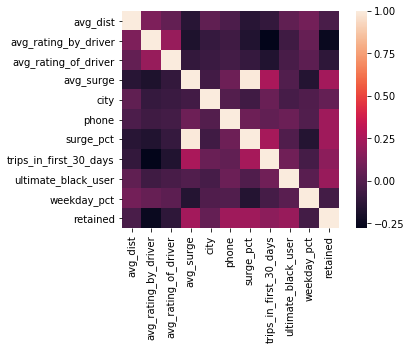

In [233]:
#create 'heatmap' of correlations between the variables
import seaborn as sns
corrmat= use_pdct.corr(method='spearman')
sns.heatmap(corrmat, square=True)

 The only features that have a strong correlation are "ave_surge" and "surge_pct" which suggests that these features are colinear and may cause overfitting in a model if both are included. 

In [234]:
#show mean surge_pct and avg_surge for retained users vs un-retained
use_pdct.groupby('retained')['surge_pct','avg_surge'].mean()

,surge_pct,avg_surge
retained,,
0,8.700091,1.075689
1,9.165615,1.073834


 It seems as though there is not much significant difference between "retained" and "not-retained" users when it comes to both "surge_pct" and "avg_surge". While both features may be removed for final modeling, for now, for the sake of avoiding colinearity, "avg_surge" will be removed since there is a <1% difference between the two groups.

In [235]:
use_pdct = use_pdct.drop('avg_surge', axis=1)

## Model Buildiing

Because the target variable is categorical/binary, the best option for modeling will be a classification algorithm. There are many options for supervised classifiers, so to see which models will be most likely to perform well with the data, the various options will be quickly tested.

In [182]:
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import sklearn.metrics
from sklearn.model_selection import train_test_split

#Supervised Learning Regressor algorithms
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [103]:
#create list of possible algorithms
models = []
models.append(('KNeighbor', KNeighborsClassifier(3)))
models.append(('Decision Tree', DecisionTreeClassifier(max_depth=5)))
models.append(('RF',RandomForestClassifier(n_jobs = -1, max_depth=5, n_estimators=10, max_features=1)))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Neural Net', MLPClassifier(alpha=1)))

# 'Gaussian Process', 'RBF SVM' and 'Linear SVM' algorithms were found to be way too computationally expensive 

In [240]:
#create a function to evaluate each model
def run_models(x,y):
    results = []
    names = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=11)
        cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

In [241]:
#separating target variable ("retained")
Y = use_pdct.retained
X = use_pdct.drop('retained', axis=1)

In [242]:
#break data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X.values, Y.values, test_size = 0.3, random_state = 10)

In [243]:
run_models(xtrain,ytrain)

KNeighbor: 0.731266 (0.006601)
Decision Tree: 0.750648 (0.006814)
RF: 0.747480 (0.006788)
AdaBoost: 0.779823 (0.005452)
Naive Bayes: 0.711221 (0.005365)
QDA: 0.718392 (0.005737)
LR: 0.693652 (0.005170)
LDA: 0.693220 (0.006027)
Neural Net: 0.741835 (0.008052)


In [244]:
run_models(xtest,ytest)

KNeighbor: 0.719459 (0.013230)
Decision Tree: 0.746340 (0.010511)
RF: 0.750303 (0.010965)
AdaBoost: 0.780205 (0.008861)
Naive Bayes: 0.717914 (0.015169)
QDA: 0.720669 (0.014226)
LR: 0.696748 (0.009933)
LDA: 0.694933 (0.010288)
Neural Net: 0.734982 (0.020226)


#### AdaBoost Classifier performs the best with both training and testing data. 

In [245]:
param_grid = {'n_estimators': [10, 50,100,500, 1000, 1500]}
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=11)
ada= AdaBoostClassifier()
clf = GridSearchCV(ada, param_grid, n_jobs =-1, cv = kfold, scoring='accuracy')
clf.fit(xtrain, ytrain)
    
print (clf.best_estimator_)
print (clf.best_score_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=1000, random_state=None)
0.784920223489


In [246]:
model= AdaBoostClassifier(n_estimators=1000)
model.fit(xtrain, ytrain)
print (model.score(xtrain, ytrain))

0.788232244686


In [247]:
model.score(xtest,ytest)

0.78222013170272808

### This Ada Boosting Classifier model has an accuracy score of 78.22% on the testing data

In [248]:
imp = model.feature_importances_ 

In [249]:
feat_import = pd.DataFrame()
feat_import['feature'] = X.columns
feat_import['Importance'] = imp
feat_import

,feature,Importance
0,avg_dist,0.305
1,avg_rating_by_driver,0.048
2,avg_rating_of_driver,0.016
3,city,0.012
4,phone,0.002
5,surge_pct,0.179
6,trips_in_first_30_days,0.079
7,ultimate_black_user,0.002
8,weekday_pct,0.357


The features found to have the highest importance on Retention Rates are "weekday_pct" (35.7%) and "avg_dist" (30.5%). "surge_pct" also had a significant level of influence (17.9%). To understand how exactly these variables affected retention, they will need to be analyzed in more detail, before Ultimate should act on the information. It may be possible to increase long-term ridership by offering incentives to users that are most likely to end usage.

Two of the features included ("phone" and "ultimate_black_user") had <1% important on predicting Retention rates. It may improve the model to drop these two variables. 

Corrections/Further study:
-  Feature Engineering - With categorical variables, it may be better to divide the features into multiple binary features (one for each class/label) in order to better pin point the effect of the feature.
-  NaN values in "phone"- instead of being dropped, could have been filled with the same ratio of values for iPhone vs Android in existing data. Could have appropriately assigned filled values by building a model that used retention rate to fill "phone" values